In [1]:
# Par rapport au premier notebook, celui-ci prend en compte les 20 clients test.
# La validation croisée se fait donc sur df_reponse privée de ses 20 clients

In [20]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # Ignorer un warning dans la cross-validation

import sys
sys.path.append('../modules')
from clustering_questions import *

In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
df= pd.read_csv("../data/df_reponses.csv", index_col = "node_id")
df

,006F52E9102A8D3BE2FE5614F42BA989_0.0,006F52E9102A8D3BE2FE5614F42BA989_1.0,006F52E9102A8D3BE2FE5614F42BA989_nan,013D407166EC4FA56EB1E1F8CBE183B9_0.0,013D407166EC4FA56EB1E1F8CBE183B9_1.0,013D407166EC4FA56EB1E1F8CBE183B9_nan,02522A2B2726FB0A03BB19F2D8D9524D_0.0,02522A2B2726FB0A03BB19F2D8D9524D_1.0,02522A2B2726FB0A03BB19F2D8D9524D_nan,02E74F10E0327AD868D138F2B4FDD6F0_0.0,...,F7E6C85504CE6E82442C770F7C8606F0_nan,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_0.0,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_1.0,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_nan,FBD7939D674997CDB4692D34DE8633C4_0.0,FBD7939D674997CDB4692D34DE8633C4_1.0,FBD7939D674997CDB4692D34DE8633C4_nan,FC221309746013AC554571FBD180E1C8_0.0,FC221309746013AC554571FBD180E1C8_1.0,FC221309746013AC554571FBD180E1C8_nan
node_id,,,,,,,,,,,,,,,,,,,,,
2c90f5883f44af68013f564a1326558a,0,1,0,1,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
2c90f5883fcf3281013fe7c2f0eb4dbe,0,1,0,0,1,0,1,0,0,1,...,0,0,0,1,0,1,0,1,0,0
2c90f588404b48480140ce4d7d301013,1,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
2c90f5884109d2c401410c40ae942d95,0,1,0,0,1,0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
2c90f5884109d2c401410c4434a433a6,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff808181717a658e017181c0a2022261,0,1,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
ff808181717a658e017181c124ca22c6,0,1,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
ff808181725806fc017299554104555f,0,0,1,1,0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1


## Suppression des clients tests et séparation en 2 (textes que l'on utilise dans un premier temps, et textes que l'on utilise pas)

In [60]:
liste_client_test=['d37394c52f494d90012f4dfc428d2551',
 '2c90f58852ae079f0152c579a76c639a',
 'd37394c527d4958801281b4ce9990aea',
 'ff8081817113806401714042579716a2',
 '2c90f588532eaccc015341b7c7317585',
 '2c90f58945d35f02014666295f0d5d86',
 'd3739445325c4b570132724fdc89792d',
 'd37394c52dba36fd012de72110da38be',
 '4028807d16245e4d0116249a641c04c2',
 'd37394c52dba36fd012dec61f2df4236',
 '2c90f5885cd183d0015cd53775170f50',
 'd37394d91b9ec55d011ba1c925a00789',
 'd37394d91b9ec55d011ba1c65210073c',
 '2c90f58858fa0bcc0158fd01690a16bf',
 'd37394453bb51e7d013bbdcdded81e57',
 '2c90f5894b136662014b4b02126c5fcb',
 'ff8081816b653c05016b74fc6e507e0f',
 '2c90f58957195ef901572414ded843f7',
 '4028807d16245e4d01162478de7600ab',
 'd373944538859c340138940b6e26682c']

In [61]:
test_set = df[df.index.isin(liste_client_test)]

In [62]:
#suppression des clients tests
df = df[~df.index.isin(liste_client_test)]

In [63]:
# Base de textes utilisée pour la comparaison

# df_reponses= pd.read_csv("../data/df_reponses.csv")
# df_text_prop = pd.read_csv("../data/clust.csv")

# df_text_prop2=df_text_prop.loc[df_text_prop['txt_node_id'].isin(list(df_reponses['node_id']))]

# compte=pd.DataFrame(df_text_prop2.sum(axis=0)).iloc[1:,:].sort_values(by=[0])
# #On a 443 clients donc on cherche à supprimer les textes qui apparaissent chez moins de 9% des clients soit moins de 40 fois
# compte.columns=['nombre']
# liste_texte_non=list(compte.loc[compte['nombre']<40].index)
# liste_texte_oui=list(compte.loc[compte['nombre']>=40].index)

txt_client = pd.read_csv("../raw_data/deep_course_cf_text_version_nodes.csv", low_memory = False)

In [27]:
liste_texte_oui = open("../data/liste_texte_oui.txt").read().split('\n')

In [28]:
len(liste_texte_oui)

1489

In [29]:
liste_texte_non = open("../data/liste_texte_non.txt").read().split('\n')

In [30]:
len(liste_texte_non)

1712

In [32]:
txt_client

,txt_version_surrogate_uuid,txt_node_id
0,d37394453d6ac204013d6d847b0a4b3a,2c90f5883f44af68013f564a1326558a
1,d37394453a046068013a0c21f6824adc,2c90f5883f44af68013f564a1326558a
2,d37394453c64588f013c70d1f1b31b49,2c90f5883f44af68013f564a1326558a
3,d3739445374d5348013783ef84d41b5c,2c90f5883f44af68013f564a1326558a
4,d373944539678fdb0139a42ace673d21,2c90f5883f44af68013f564a1326558a
...,...,...
329937,2c90f58949c4b4ca0149f1e9b745274f,ff80818173787da801739e854673578c
329938,ff8081816cc9b7d5016cccca8dfc14e7,ff80818173787da801739e854673578c
329939,d3739445333b0e9c01336996466c31a1,ff80818173787da801739e854673578c
329940,d373944534afdf1e0134b3bb69031a2d,ff80818173787da801739e854673578c


In [33]:
txt_client['txt_version_surrogate_uuid'].nunique()

7369

# Textes les plus fréquents

In [64]:
# Texte à gauche, client à droite
txt_client = txt_client.loc[txt_client["txt_version_surrogate_uuid"].isin(liste_texte_oui)]
txt_client

,txt_version_surrogate_uuid,txt_node_id
1,d37394453a046068013a0c21f6824adc,2c90f5883f44af68013f564a1326558a
2,d37394453c64588f013c70d1f1b31b49,2c90f5883f44af68013f564a1326558a
3,d3739445374d5348013783ef84d41b5c,2c90f5883f44af68013f564a1326558a
5,d373944535c610f20135ec1883a854bf,2c90f5883f44af68013f564a1326558a
6,d3739445355c87aa01355cae7693349d,2c90f5883f44af68013f564a1326558a
...,...,...
329937,2c90f58949c4b4ca0149f1e9b745274f,ff80818173787da801739e854673578c
329938,ff8081816cc9b7d5016cccca8dfc14e7,ff80818173787da801739e854673578c
329939,d3739445333b0e9c01336996466c31a1,ff80818173787da801739e854673578c
329940,d373944534afdf1e0134b3bb69031a2d,ff80818173787da801739e854673578c


In [65]:
# Nombre d'application de textes (aux clients étudiés, et aux textes les + fréquents)
len(txt_client[txt_client["txt_node_id"].isin(df.index)]["txt_version_surrogate_uuid"])

218522

In [66]:
txt_client["txt_version_surrogate_uuid"].nunique()

1488

### Validation croisée sans shuffle

 1  cluster(s)
0  faux négatifs  parmi  218522  textes à identifier

faux_negatifs
0    423
En moyenne  0.0 faux négatifs par client, soit 0.0 au total
La médiane est de  0.0  faux négatifs

 2  cluster(s)
179  faux négatifs  parmi  218522  textes à identifier

faux_negatifs
0     404
1       3
2       1
3       4
5       1
6       1
7       1
9       2
10      2
11      1
13      1
36      1
46      1
En moyenne  0.4231678486997636 faux négatifs par client, soit 179.0 au total
La médiane est de  0.0  faux négatifs

 3  cluster(s)
868  faux négatifs  parmi  218522  textes à identifier

faux_negatifs
0      374
1        7
2        2
3        4
4        1
5        2
6        3
7        2
8        4
9        1
11       3
14       2
15       1
16       3
17       1
18       2
21       1
22       1
23       1
27       1
29       1
36       1
38       1
56       1
57       1
67       1
205      1
En moyenne  2.0520094562647753 faux négatifs par client, soit 867.9999999999999 au total
La médi

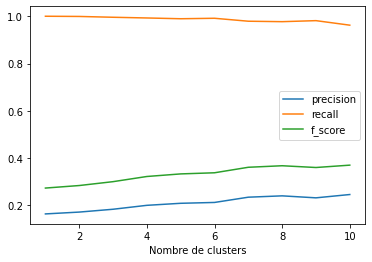

In [39]:
cross_validation(df, txt_client, n_clusters=range(1,11), K=10, shuffle=False)

### Validation croisée avec shuffle

 1  cluster(s)
0  faux négatifs  parmi  218522  textes à identifier

faux_negatifs
0    423
En moyenne  0.0 faux négatifs par client, soit 0.0 au total
La médiane est de  0.0  faux négatifs

 2  cluster(s)
156  faux négatifs  parmi  218522  textes à identifier

faux_negatifs
0     407
1       6
2       2
6       1
7       2
9       1
13      1
25      1
32      1
47      1
En moyenne  0.36879432624113473 faux négatifs par client, soit 156.0 au total
La médiane est de  0.0  faux négatifs

 3  cluster(s)
1146  faux négatifs  parmi  218522  textes à identifier

faux_negatifs
0     367
1      10
2       6
3       2
4       1
5       1
8       2
9       2
10      1
11      1
14      1
15      1
17      2
18      1
19      2
21      1
23      1
24      3
25      1
27      1
29      1
34      3
36      1
42      1
45      1
47      2
50      1
52      1
54      1
56      2
67      1
84      1
En moyenne  2.7092198581560285 faux négatifs par client, soit 1146.0 au total
La médiane est de  0.0 

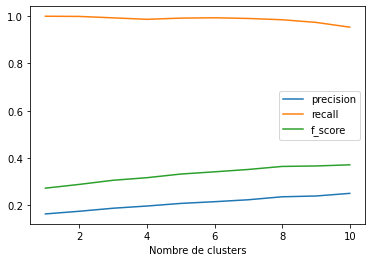

In [40]:
cross_validation(df, txt_client, n_clusters=range(1,11), K=10, shuffle=True)

# Résultats sur les 20 clients test

In [67]:
n=8
#Si on lance pour une seconde fois, exécuter cette commande, sinon la colonne clust sera prise en compte dans le clustering !
# df.drop("clust", inplace=True, axis=1)
model = AgglomerativeClustering(n)
model = model.fit(df)

df["clust"] = model.labels_
#Base de lien texte/client + cluster
fus = create_fusion(df, n)
fus =fus[fus["surrogate_uuid"].isin(liste_texte_oui)]
score(fus, txt_client, test_set, prediction(df,test_set))

,precision,recall,faux_negatifs,Nombre de textes à identifier,Nombre de textes proposés
node_id,,,,,
2c90f58852ae079f0152c579a76c639a,0.285618,1.000000,0,425,1488
2c90f588532eaccc015341b7c7317585,0.243280,1.000000,0,362,1488
2c90f58858fa0bcc0158fd01690a16bf,0.265566,0.991597,3,357,1333
2c90f5885cd183d0015cd53775170f50,0.354089,0.967213,16,488,1333
2c90f58945d35f02014666295f0d5d86,0.315860,1.000000,0,470,1488
2c90f5894b136662014b4b02126c5fcb,0.283695,1.000000,0,301,1061
2c90f58957195ef901572414ded843f7,0.289350,1.000000,0,307,1061
4028807d16245e4d01162478de7600ab,0.508065,1.000000,0,756,1488
4028807d16245e4d0116249a641c04c2,0.352498,1.000000,0,374,1061


# Textes les moins fréquents

In [53]:
txt_client = pd.read_csv("../raw_data/deep_course_cf_text_version_nodes.csv", low_memory = False)
txt_client = txt_client.loc[txt_client["txt_version_surrogate_uuid"].isin(liste_texte_non)]
txt_client

,txt_version_surrogate_uuid,txt_node_id
0,d37394453d6ac204013d6d847b0a4b3a,2c90f5883f44af68013f564a1326558a
4,d373944539678fdb0139a42ace673d21,2c90f5883f44af68013f564a1326558a
12,d37394c52dba36fd012e04540b122440,2c90f5883f44af68013f564a1326558a
14,d37394c52786ffe00127aa573aa453a6,2c90f5883f44af68013f564a1326558a
15,d37394c52657b4010126ad3f2c2f1062,2c90f5883f44af68013f564a1326558a
...,...,...
329897,ff808181742779cf01744921feb92856,ff80818173787da801739e854673578c
329906,ff80818171c7c7500171e921c6c12ff9,ff80818173787da801739e854673578c
329907,ff80818174c1e0dd0174e4172aff51e5,ff80818173787da801739e854673578c
329914,ff80818174c1e0dd0174e344b80e6e34,ff80818173787da801739e854673578c


In [54]:
len(txt_client[txt_client["txt_node_id"].isin(df.index)]["txt_version_surrogate_uuid"])

32054

In [55]:
txt_client["txt_version_surrogate_uuid"].nunique()

1711

### Validation croisée sans shuffle

 1  cluster(s)
637  faux négatifs  parmi  32054  textes à identifier

faux_negatifs
0     297
1      51
2      24
3      10
4       8
5       9
6       7
7       3
9       1
10      1
12      4
13      1
14      1
15      1
16      1
57      1
62      3
En moyenne  1.5059101654846336 faux négatifs par client, soit 637.0 au total
La médiane est de  0.0  faux négatifs

 2  cluster(s)
1062  faux négatifs  parmi  32054  textes à identifier

faux_negatifs
0     269
1      56
2      26
3      11
4       9
5       9
6       8
7       6
8       1
9       3
10      2
12      5
14      2
15      2
16      1
19      2
20      1
21      1
22      1
25      1
31      1
57      1
62      3
78      1
83      1
En moyenne  2.5106382978723403 faux négatifs par client, soit 1062.0 au total
La médiane est de  0.0  faux négatifs

 3  cluster(s)
2138  faux négatifs  parmi  32054  textes à identifier

faux_negatifs
0      239
1       50
2       22
3       12
4       11
5       14
6        9
7        7
8    

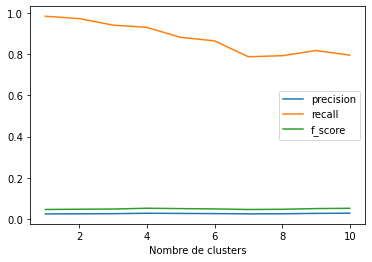

In [56]:
cross_validation(df, txt_client, n_clusters=range(1,11), K=10, shuffle=False)

# Résultats sur les 20 clients test

In [58]:
n=3
#Si on lance pour une seconde fois, exécuter cette commande, sinon la colonne clust sera prise en compte dans le clustering !
# df.drop("clust", inplace=True, axis=1)
model = AgglomerativeClustering(n)
model = model.fit(df)

df["clust"] = model.labels_
#Base de lien texte/client + cluster
fus = create_fusion(df, n)
fus =fus[fus["surrogate_uuid"].isin(liste_texte_non)]
score(fus, txt_client, test_set, prediction(df,test_set))

,precision,recall,faux_negatifs,Nombre de textes à identifier,Nombre de textes proposés
node_id,,,,,
2c90f58852ae079f0152c579a76c639a,0.013142,1.000000,0,22,1674
2c90f588532eaccc015341b7c7317585,0.014337,1.000000,0,24,1674
2c90f58858fa0bcc0158fd01690a16bf,0.014934,1.000000,0,25,1674
2c90f5885cd183d0015cd53775170f50,0.024492,0.976190,1,42,1674
2c90f58945d35f02014666295f0d5d86,0.023297,1.000000,0,39,1674
2c90f5894b136662014b4b02126c5fcb,0.198738,1.000000,0,63,317
2c90f58957195ef901572414ded843f7,0.154574,1.000000,0,49,317
4028807d16245e4d01162478de7600ab,0.142174,0.995816,1,239,1674
4028807d16245e4d0116249a641c04c2,0.217666,1.000000,0,69,317


# Tous les textes (abandonné)

 1  cluster(s)
6528  faux négatifs  parmi  256467  textes à identifier

faux_negatifs
0      72
1      49
2      27
3      32
4      28
5      24
6      22
7      17
8      21
9      11
10      4
11      6
12     14
13      5
14      5
15      3
16      5
17      3
18      6
19      5
20      7
21      4
22      3
23      1
24      1
25      1
26      1
27      2
28      1
30      1
31      2
35      1
37      1
42      2
43      1
51      1
54      1
57      1
61      1
62      1
63      1
67      1
70      1
72      2
84      1
99      2
108     3
110     2
111     1
112     1
115     2
116     1
119     1
125     1
126     1
130     1
142     1
143     1
150     1
189     1
205     2
210     1
262     1
En moyenne  15.432624113475176 faux négatifs par client, soit 6528.0 au total
La médiane est de  5.0  faux négatifs

 2  cluster(s)
7132  faux négatifs  parmi  256467  textes à identifier

faux_negatifs
0      69
1      46
2      26
3      26
4      27
5      26
6      23
7      18
8

17648  faux négatifs  parmi  256467  textes à identifier

faux_negatifs
0      16
1      24
2      18
3      21
4      20
5      14
6      21
7      16
8      13
9      10
10     11
11      8
12     10
13      9
14      2
15      9
16      6
17      4
18      9
19      3
20      7
21      4
22      5
23      7
24      1
25      2
26      2
27      1
28      3
29      5
30      1
31      4
32      2
33      1
34      2
35      2
36      1
37      1
38      1
39      2
40      2
41      1
42      1
43      4
45      4
46      1
47      1
48      1
49      3
50      2
51      5
52      2
53      3
54      1
55      1
57      1
58      1
59      2
60      4
61      1
62      1
64      2
65      2
70      3
71      1
72      1
74      1
76      1
77      2
78      1
80      2
81      3
86      2
87      1
88      1
89      1
91      1
92      1
97      1
98      1
100     1
103     1
104     1
105     1
106     1
107     1
108     1
111     2
113     1
114     1
115     1
116     2
117     

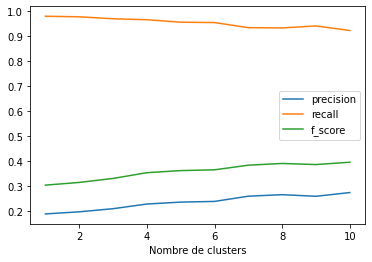

In [31]:
cross_validation(df, txt_client, n_clusters=range(1,11), K=10, shuffle=False)

# Résultats sur les 20 clients test

In [67]:
txt_client = txt_client.loc[(txt_client["txt_version_surrogate_uuid"].isin(liste_texte_oui)) | (txt_client["txt_version_surrogate_uuid"].isin(liste_texte_non))]

In [69]:
txt_client["txt_version_surrogate_uuid"].nunique()

3199

In [71]:
n=10
model = AgglomerativeClustering(n)
model = model.fit(df)



df["clust"] = model.labels_
#Base de lien texte/client + cluster
fus = create_fusion(df, n)
score(fus, txt_client, test_set, prediction(df,test_set))

,precision,recall,faux_negatifs,Nombre de textes à identifier,Nombre de textes proposés
node_id,,,,,
2c90f58852ae079f0152c579a76c639a,0.211348,1.000000,0,447,2115
2c90f588532eaccc015341b7c7317585,0.182506,1.000000,0,386,2115
2c90f58858fa0bcc0158fd01690a16bf,0.158949,0.997382,1,382,2397
2c90f5885cd183d0015cd53775170f50,0.218189,0.986792,7,530,2397
2c90f58945d35f02014666295f0d5d86,0.238771,0.992141,4,509,2115
2c90f5894b136662014b4b02126c5fcb,0.564341,1.000000,0,364,645
2c90f58957195ef901572414ded843f7,0.551938,1.000000,0,356,645
4028807d16245e4d01162478de7600ab,0.407565,0.866332,133,995,2115
4028807d16245e4d0116249a641c04c2,0.686822,1.000000,0,443,645
